In [2]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

## (einfache) Lineare Regression

In [2]:
xi = [1, 4, 5, 7, 9]
yi = [1.0, 3.1, 4.7, 4.4, 7.5]


In [3]:
def variance(data):
    sum = 0
    mean = np.mean(data)
    for i in range(len(data)):
        sum += (data[i] - mean)**2
    return sum / (len(data) - 1)

def lrm(a, b, x):
    return a + b * x

def residuals(y, x, a, b):
    res = []
    for i in range(len(y)):
        res.append(y[i] - lrm(a, b, x[i]))
    return res

def residuals_var(y, x, a, b):
    res = []
    for i in range(len(y)):
        res.append((y[i] - lrm(a, b, x[i]))**2)
    return sum(res) / (len(y) - 2)

def s_alpha2(x, var_x, var_residuals):
    return ((1 / len(x)) + (np.mean(x)**2) / ((len(x) - 1) * var_x)) * var_residuals

def s_beta2(x, var_x, var_residuals):
    return (1 / ((len(x) - 1) * var_x)) * var_residuals

def matrix_approach(x, y):
    design_matrix = np.c_[np.ones((len(x), 1)), x]
    X = design_matrix
    Y = np.array(y)
    Xt = X.T

    B = np.linalg.inv(Xt.dot(X)).dot(Xt).dot(Y)
    return B

### Model

In [4]:
x_mean = np.mean(xi)
y_mean = np.mean(yi)
x_var = variance(xi)
y_var = variance(yi)
s_xy = np.cov(xi, yi)[1][0]

# Formeln
beta = s_xy / x_var
alpha = y_mean - beta * x_mean

a, b = matrix_approach(xi, yi)

print("--------- Formeln ----------")
print(f"alpha: {alpha}, beta: {beta}")
print(f"y = {alpha:.2f} + {beta:.2f}x")


print("--------- Matrix ----------")
print(f"alpha: {alpha}, beta: {beta}")
print(f"y = {b:.2f}x {a:.2f}")

--------- Formeln ----------
alpha: 0.24565217391304284, beta: 0.748913043478261
y = 0.25 + 0.75x
--------- Matrix ----------
alpha: 0.24565217391304284, beta: 0.748913043478261
y = 0.75x 0.25


### Konfidenzintervalle

In [5]:
t3_975 = 3.1824 # error 0.05

s_alpha =  s_alpha2(xi, x_var, residuals_var(yi, xi, alpha, beta))
I_alpha = [alpha - t3_975 * s_alpha**0.5, alpha + t3_975 * s_alpha**0.5]
print(f"alpha: {alpha}, s_alpha: {s_alpha}, I_alpha: {I_alpha}")

s_beta2 = s_beta2(xi, x_var, residuals_var(yi, xi, alpha, beta))
I_beta = [beta - t3_975 * s_beta2**0.5, beta + t3_975 * s_beta2**0.5]
print(f"beta: {beta}, s_beta: {s_beta2}, I_beta: {I_beta}")

alpha: 0.24565217391304284, s_alpha: 0.6144502205419031, I_alpha: [-2.248931742816872, 2.7402360906429575]
beta: 0.748913043478261, s_beta: 0.017861925015752997, I_beta: [0.32359001584228986, 1.1742360711142323]


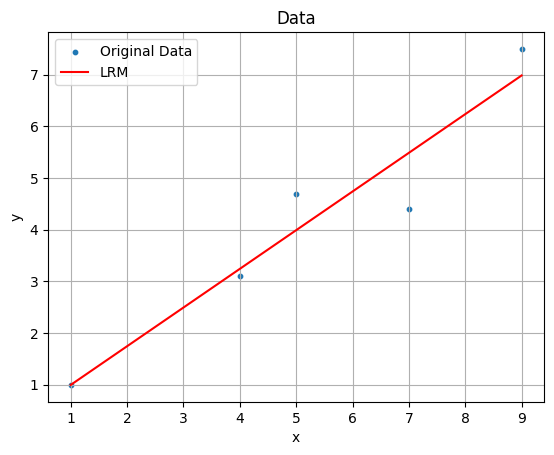

In [8]:
def plot(x, y):
    plt.scatter(x, y, s=10, label="Original Data")
    plt.plot(x, [lrm(a, b, xi) for xi in x], color='red', label="LRM")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Data')
    plt.grid()
    plt.legend()
    plt.show()
    
plot(xi, yi)

## Multiple Lineare Regression

In [41]:
import pandas as pd
from sklearn import linear_model

df = pd.read_csv('data-2.csv')

### Sklearn

In [69]:
X = df[['Weight', 'Volume']]
y = df['CO2']

regr = linear_model.LinearRegression()
regr.fit(X, y)

b1, b2 = regr.coef_
b0 = regr.intercept_

print(f"beta0: {b0:2f}, beta1: {b1:2f}, beta2: {b2:2f}")

predictedCO2 = regr.predict([[3300, 1300]])

print(predictedCO2)

beta0: 79.694719, beta1: 0.007551, beta2: 0.007805
[114.75968007]


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Normalengleichung

In [70]:
x1 = df["Weight"]
x2 = df["Volume"]
x0 = [1] * len(x1)
y = df["CO2"]

X = np.c_[x0, x1, x2]

def lsg_der_normalen_gleichung(x, y):
    X = x
    Xt = X.T
    Y = np.array(y)

    B = np.linalg.inv(Xt.dot(X)).dot(Xt).dot(Y)
    return B

beta0, beta1, beta2 = lsg_der_normalen_gleichung(X, y)

print(f"beta0: {beta0:2f}, beta1: {beta1:2f}, beta2: {beta2:2f}")

def lrm(x1, x2, beta0, beta1, beta2):
    return beta0 + beta1 * x1 + beta2 * x2


predictedCO2 = lrm(2300, 1300, beta0, beta1, beta2)
print(predictedCO2)

beta0: 79.694719, beta1: 0.007551, beta2: 0.007805
107.20873279893105


## Logistische Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [29]:
temp = [66, 67, 68, 70, 72, 75, 76, 79, 53, 58, 70, 75, 67, 67, 69, 70, 73, 76, 78, 81, 57, 63, 70]
ausfall = [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
aufall_jn = ['Kein-Ausfall' if i == 0 else 'Ausfall' for i in ausfall]
ausprägung = [i for i in range(len(temp))]

df = pd.DataFrame({"ausprägung": ausprägung, 'temp': temp, 'ausfall': ausfall, 'ausfall_jn': aufall_jn})

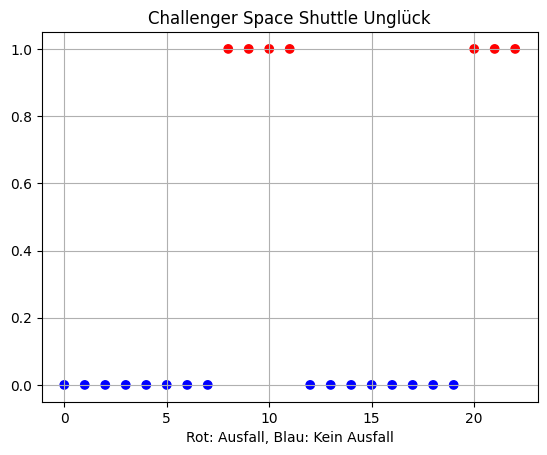

In [38]:
colors = {0: "blue", 1: "red"}
plt.scatter(df["ausprägung"], df["ausfall"], c=df["ausfall"].apply(lambda x: colors[x]))
plt.grid(True)
plt.xlabel("Rot: Ausfall, Blau: Kein Ausfall")
plt.title("Challenger Space Shuttle Unglück")
plt.show()

In [48]:
X = df[['temp']]
y = df['ausfall']

model = LogisticRegression()

model.fit(X, y)

coefficient = model.coef_
intercept = model.intercept_

coefficient = coefficient[0][0]
intercept = intercept[0]
print("Coefficient beta:", coefficient)
print("Intercept alpha:", intercept)
print(f"y = {intercept:.2f} + {coefficient:.2f}x")

Coefficient beta: -0.22950051284078976
Intercept alpha: 14.861927086730802
y = 14.86 + -0.23x


## Poisson Regression

In [11]:
import statsmodels.api as sm

In [30]:
data = pd.DataFrame(
    {
        "Nummer": [i for i in range(1, 42)],
        "Alter": [27, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 30, 32, 33, 33, 33, 33, 33, 34, 34, 34, 
                  34, 36, 36, 37, 37, 37, 38, 39, 41, 42, 43, 43, 43, 43, 43, 44, 45, 47, 48, 52],
        "Paarungen": [0, 1, 1, 1, 3, 0, 0, 0, 2, 2,2, 1, 2, 4, 3, 3, 3, 2, 1, 1, 2, 3, 5, 6, 1, 1, 6, 2, 1, 3, 4, 0, 2, 3, 4, 9, 3, 5, 7, 2, 9]
    }
)

In [31]:
X = data[["Alter"]]
y = data["Paarungen"]

X = sm.add_constant(X)


poisson_model = sm.GLM(y, X, family=sm.families.Poisson()).fit()
b0, b1 = poisson_model.params

print(f"Poisson Regression Model λ = exp({b0:.2f} + {b1:.3f}x)") 


Poisson Regression Model λ = exp(-1.58 + 0.069x)
